##Q(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


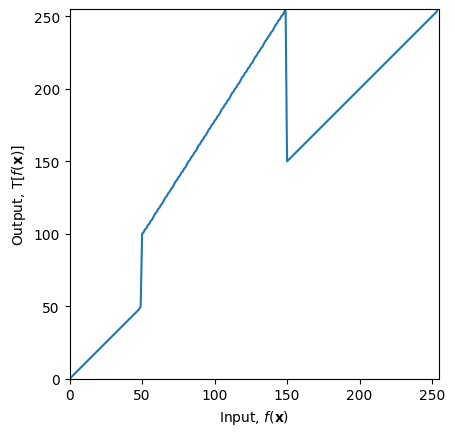

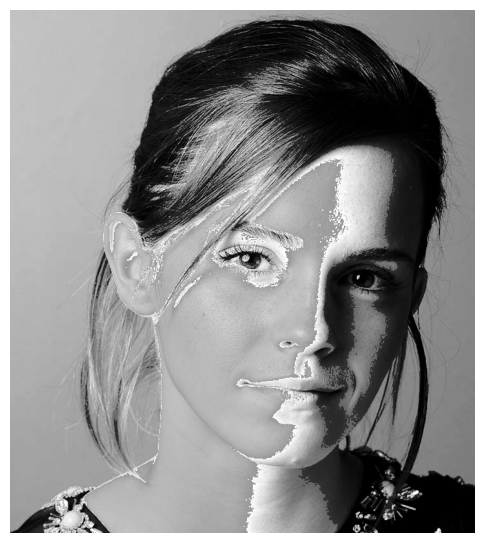

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/openCV/a1images/a1images/emma.jpg'
img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)

c= np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])
t1=np.linspace(0,c[0,1],c[0,1]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[1,1]).astype('uint8')
t3=np.linspace(c[2,0]+1,c[4,0],c[4,0]-c[3,0]).astype('uint8')

transform = np.concatenate([t1, t2, t3])
img_transformed = cv.LUT(img,transform)

fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


fig,ax = plt.subplots(1,1,figsize=(6,8))
ax.imshow(img_transformed,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
plt.show()


##Q(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


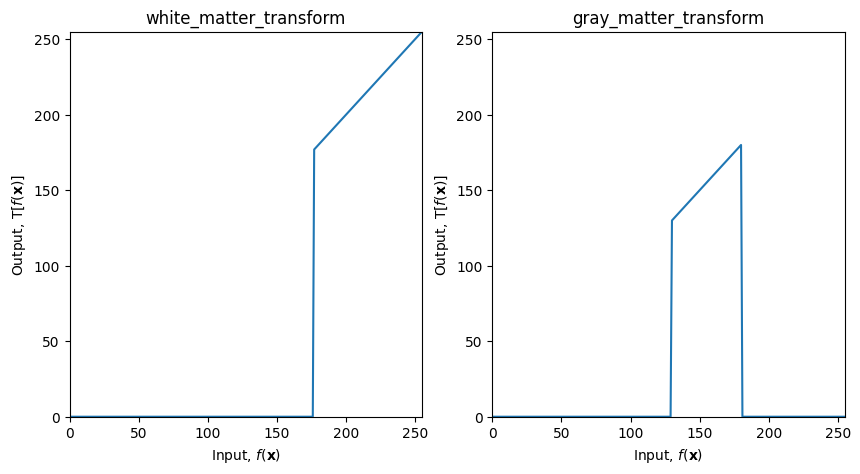

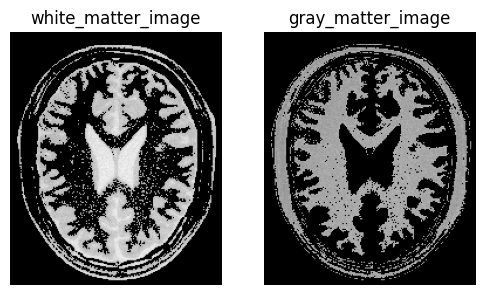

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/openCV/a1images/a1images/brain_proton_density_slice.png'
image = cv.imread(image_path,cv.IMREAD_GRAYSCALE)

white_threshold_upper = 255
white_threshold_lower = 177
white_matter_transform1 = np.linspace(0,0,white_threshold_lower,dtype='uint8')
white_matter_transform2 = np.linspace(white_threshold_lower,white_threshold_upper,white_threshold_upper-white_threshold_lower+1,dtype='uint8')
white_matter_transform = np.concatenate([white_matter_transform1,white_matter_transform2])

white_matter_image = cv.LUT(image,white_matter_transform)

gray_threshold_lower = 130
gray_threshold_upper = 180
gray_matter_transform1 = np.linspace(0,0,gray_threshold_lower,dtype='uint8')
gray_matter_transform2 = np.linspace(gray_threshold_lower,gray_threshold_upper,gray_threshold_upper-gray_threshold_lower+1,dtype='uint8')
gray_matter_transform3 = np.linspace(0,0,255-gray_threshold_upper,dtype='uint8')
gray_matter_transform = np.concatenate([gray_matter_transform1,gray_matter_transform2,gray_matter_transform3])

gray_matter_image = cv.LUT(image,gray_matter_transform)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(white_matter_transform)
ax[0].set_title('white_matter_transform')
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
#ax[0].set_aspect('equal')

ax[1].plot(gray_matter_transform)
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_title('gray_matter_transform')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
#ax[1].set_aspect('equal')
plt.show()


fig,ax = plt.subplots(1,2,figsize=(6,8))
ax[0].imshow(white_matter_image,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('white_matter_image')
ax[0].axis('off')
ax[1].imshow(gray_matter_image,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('gray_matter_image')
ax[1].axis('off')
plt.show()

##Q(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


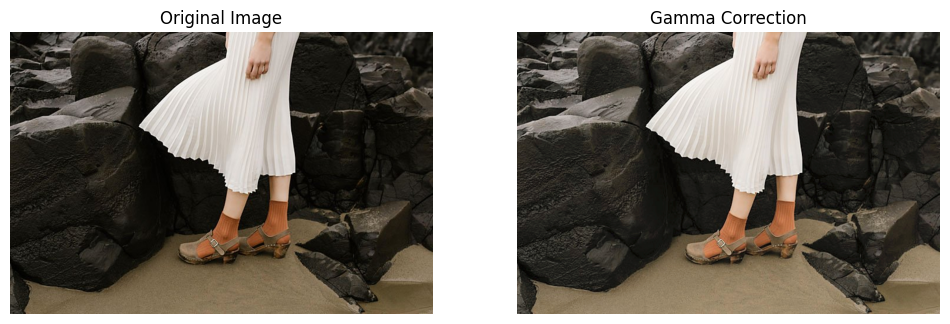

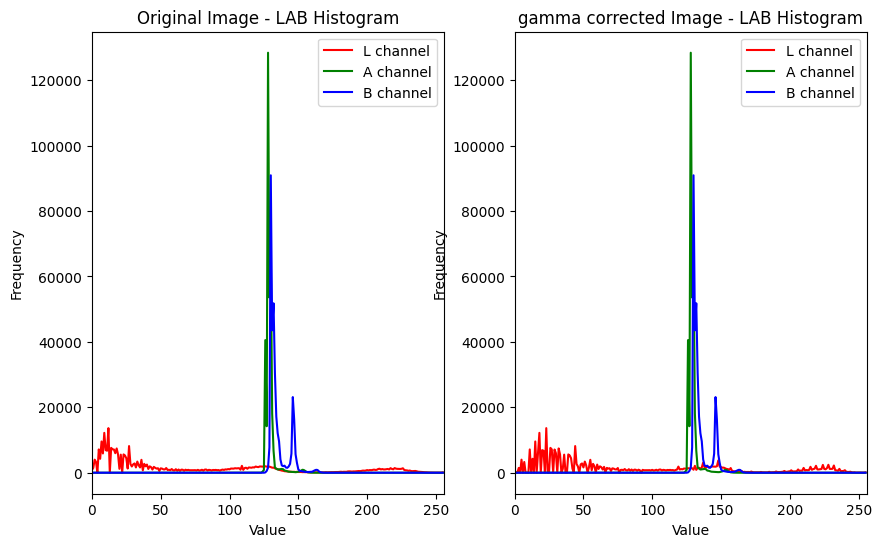

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/highlights_and_shadows.jpg')

img_lab = cv.cvtColor(f,cv.COLOR_BGR2LAB)
L,a,b = cv.split(img_lab)

gamma = 0.78

t = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

gamma_corrected_l_channel = cv.LUT(L,t)
gamma_image = cv.merge([gamma_corrected_l_channel,a,b])
corrected_image = cv.cvtColor(gamma_image,cv.COLOR_LAB2BGR)

fig,ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(corrected_image,cv.COLOR_BGR2RGB))
ax[1].set_title('Gamma Correction')
for a in ax:
  a.axis('off')
plt.show()

channels = ['L','A','B']
colors = ['red','green','blue']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
for i,col in enumerate(colors):
  hist = cv.calcHist([img_lab],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('Original Image - LAB Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
for i,col in enumerate(colors):
  hist = cv.calcHist([gamma_image],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('gamma corrected Image - LAB Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()



##Q(4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


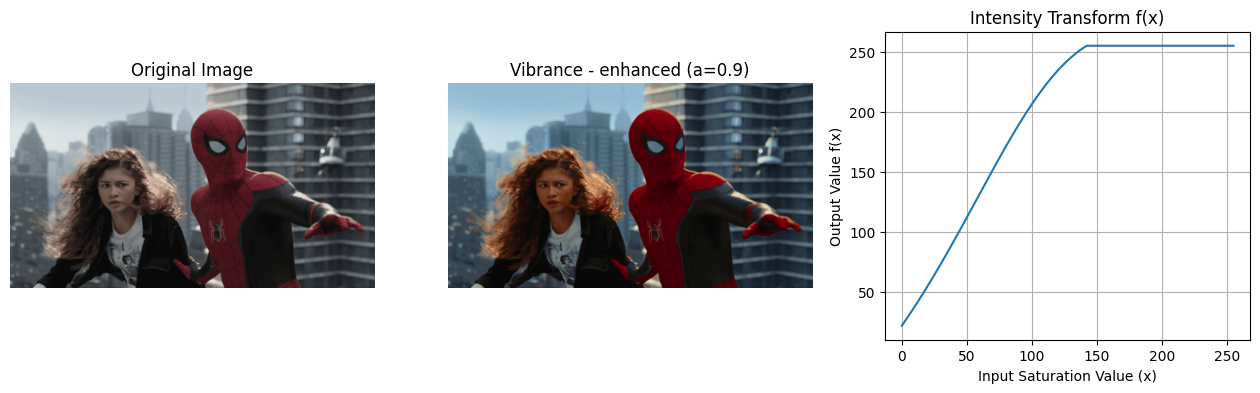

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/spider.png')

a=0.9 #vibrance strength , range [0,1]
sigma = 70.0

#Convert to HSV
hsv=cv.cvtColor(f,cv.COLOR_BGR2HSV).astype(np.float32)
H,S,V = cv.split(hsv)

def vibrance_transform(x , a , sigma):
  exponent = -((x-128.0)**2)/(2.0*(sigma**2))
  delta = a*np.exp(exponent)*128
  y=x+delta
  return np.minimum(y,255.0)

s_trans = vibrance_transform(S, a=a , sigma=sigma) # Apply transform to Saturation plane

hsv_trans = cv.merge([H , s_trans , V]).astype(np.uint8)

gsv_trans_image = cv.cvtColor(hsv_trans,cv.COLOR_HSV2BGR)
gsv_trans_image = cv.cvtColor(gsv_trans_image,cv.COLOR_BGR2RGB)

x_vals = np.arange(0,256)
y_vals = vibrance_transform(x_vals.astype(np.float32) , a , sigma)

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gsv_trans_image)
plt.title(f"Vibrance - enhanced (a={a})")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(x_vals , y_vals)
plt.title("Intensity Transform f(x)")
plt.xlabel("Input Saturation Value (x)")
plt.ylabel("Output Value f(x)")
plt.xaxis = MaxNLocator(integer = True)
plt.grid(True)
#plt.tight_layout()
plt.show()

##Q(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


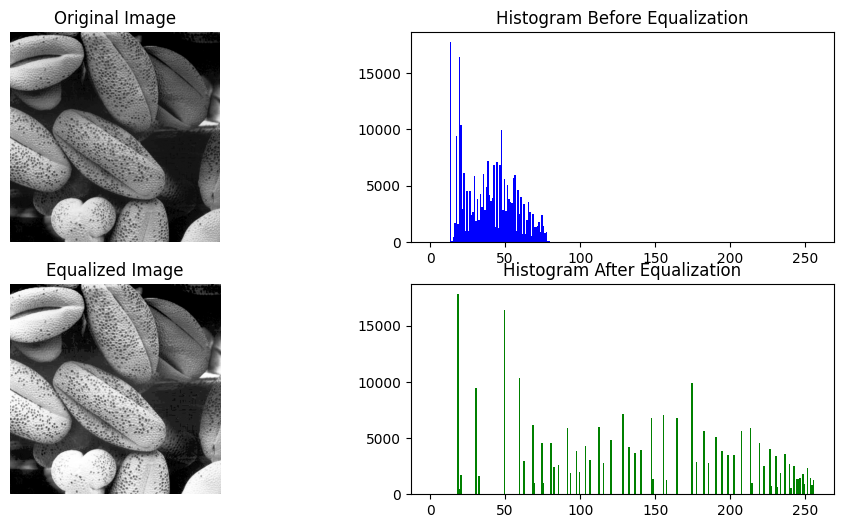

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/shells.tif',cv.IMREAD_GRAYSCALE)

def custom_histogram_equalization(img):
  flat = img.flatten() #Flatten image to 1D array
  hist = np.bincount(flat,minlength=256) # Calculate histogram
  hist_norm = hist/float(flat.size) # Normalize histogram to get probability distribution
  cdf = hist_norm.cumsum() # Compute CDF
  cdf_scaled = np.round(cdf * 255).astype(np.uint8) #Normalized CDF to range 0 - 255
  equalized_flat = cdf_scaled[flat]
  equalized_img = equalized_flat.reshape(img.shape)
  return equalized_img

equalized_img = custom_histogram_equalization(f)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(f,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,2,2)
plt.hist(f.flatten(),bins=256,range=[0,256],color='blue')
plt.title("Histogram Before Equalization")

plt.subplot(2,2,3)
plt.imshow(equalized_img,cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(equalized_img.flatten(),bins=256,range=[0,256],color = 'green')
plt.title("Histogram After Equalization")

plt.show()


##Q(6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


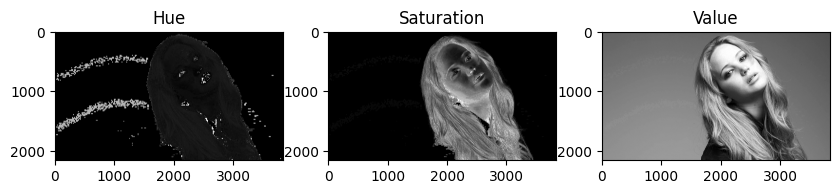

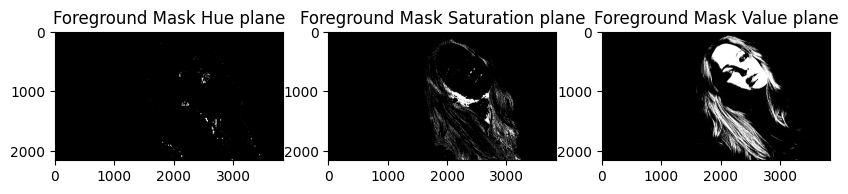

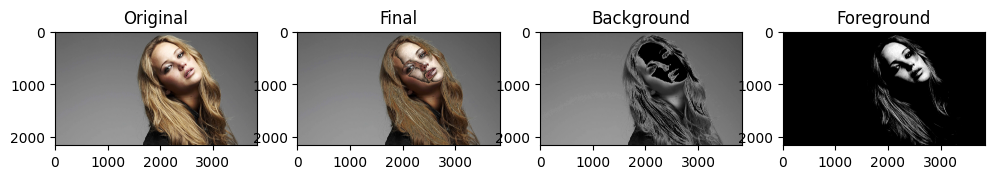

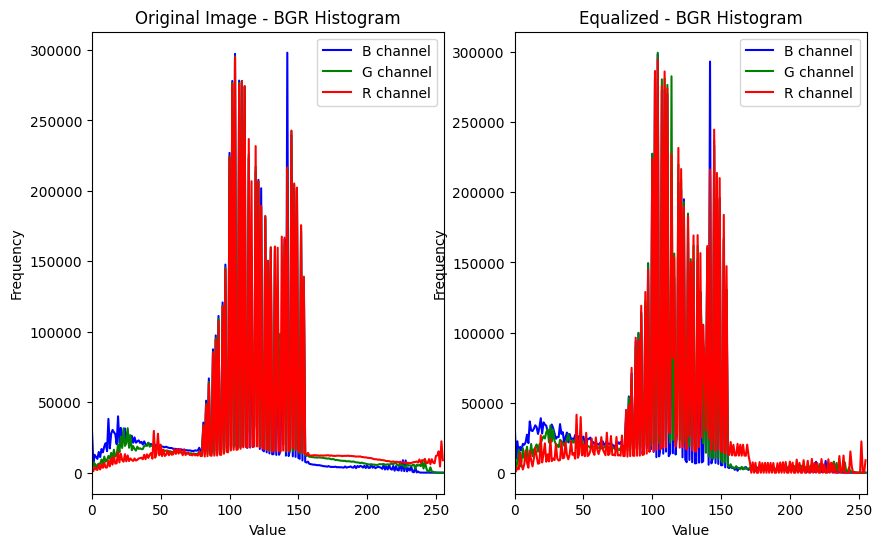

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/jeniffer.jpg')

hsv = cv.cvtColor(f,cv.COLOR_BGR2HSV)

h , s , v = cv.split(hsv)
#Display H , S , V Planes
plt.figure(figsize=(10,5))
plt.subplot(1,3,1),plt.imshow(h , cmap='gray'),plt.title('Hue')
plt.subplot(1,3,2),plt.imshow(s , cmap='gray'),plt.title('Saturation')
plt.subplot(1,3,3),plt.imshow(v , cmap='gray'),plt.title('Value')
plt.show()

threshold = 170
#Choose a plane for thresholding
_,mask_h = cv.threshold(h,threshold,255,cv.THRESH_BINARY)
_,mask_s = cv.threshold(s,threshold,255,cv.THRESH_BINARY)
_,mask_v = cv.threshold(v,threshold,255,cv.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1),plt.imshow(mask_h,cmap='gray'),plt.title('Foreground Mask Hue plane')
plt.subplot(1,3,2),plt.imshow(mask_s,cmap='gray'),plt.title('Foreground Mask Saturation plane')
plt.subplot(1,3,3),plt.imshow(mask_v,cmap='gray'),plt.title('Foreground Mask Value plane')
plt.show()

#Extract the foreground from the chosen channel
foreground = cv.bitwise_and(v,v,mask=mask_v)
# Compute Histogram
hist = cv.calcHist([foreground],[0],mask_v,[256],[0,256])

#Histogram Equalization manually
L = 256
MN = np.sum(mask_v>0) # Number of pixels in the foreground
cdf = hist.cumsum() #Cumulative sum of histogram
equalization_map = np.round((L-1) * cdf/MN) . astype('uint8')
equalized_foreground = equalization_map[foreground]


#Extract background & combine
background = cv.bitwise_and(v,v,mask=cv.bitwise_not(mask_v))
combine_v = cv.add(background,equalized_foreground)

final_hsv = cv.merge([h,s,combine_v])
result = cv.cvtColor(final_hsv,cv.COLOR_HSV2BGR)


#show
plt.figure(figsize=(12,6))
plt.subplot(1,4,1),plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,4,2),plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB)),plt.title('Final')
plt.subplot(1,4,3),plt.imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB)),plt.title('Background')
plt.subplot(1,4,4),plt.imshow(cv.cvtColor(equalized_foreground,cv.COLOR_BGR2RGB)),plt.title('Foreground')
plt.show()

channels = ['B','G','R']
colors = ['blue','green','red',]

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
for i,col in enumerate(colors):
  hist = cv.calcHist([f],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('Original Image - BGR Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
for i,col in enumerate(colors):
  hist = cv.calcHist([result],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('Equalized - BGR Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

##Q(7)

Mounted at /content/drive


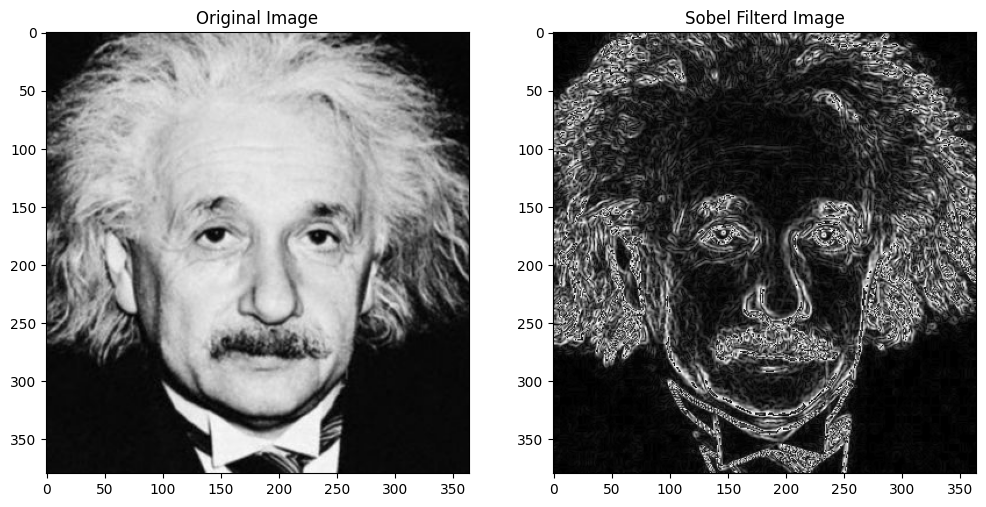

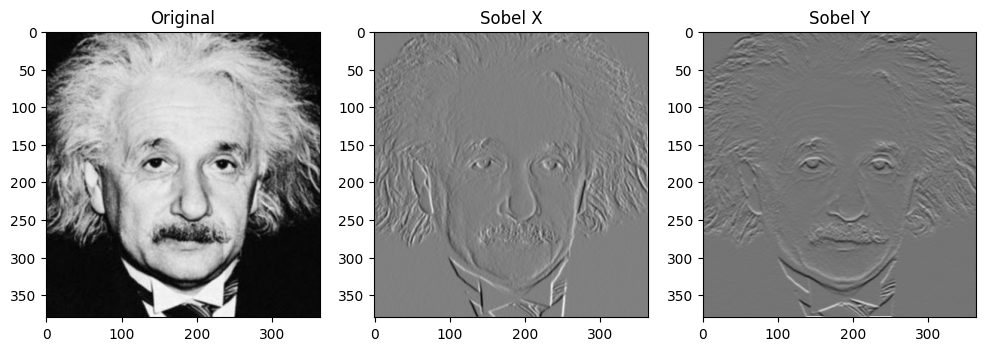

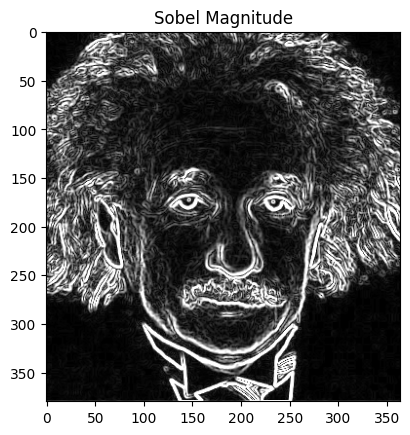

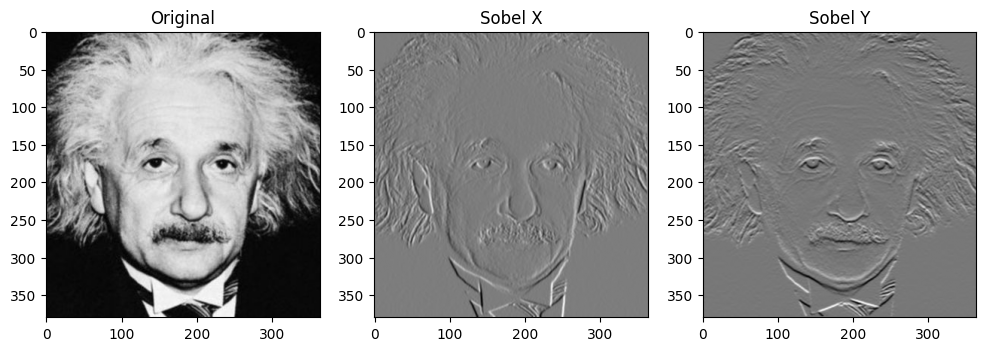

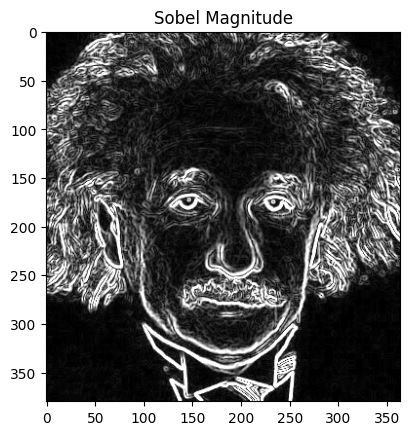

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/einstein.png')

#Using OpenCV's filter2D for Sobel Filtering
def sobel_filter(img):
  sobel_x = np.array([[1,0,-1],
                      [2,0,-2],
                      [1,0,-1]])
  sobel_y = np.array([[1,2,1],
                      [0,0,0],
                      [-1,-2,-1]])
  grad_x = cv.filter2D(img,cv.CV_64F,sobel_x)
  grad_y = cv.filter2D(img,cv.CV_64F,sobel_y)

  gradient = np.sqrt(grad_x**2+grad_y**2)
  gradient = np.uint8(gradient)

  return gradient

plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(f,cmap='gray'),plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(sobel_filter(f),cmap='gray'),plt.title('Sobel Filterd Image')
plt.show()

#Custom Sobel
sobel_x = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])

sobel_y = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

def apply_filter(img , kernel):
  h,w = img.shape
  kh , kw =kernel.shape
  pad_h , pad_w = kh//2 , kw//2

  padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
  output = np.zeros_like(img, dtype=np.float32)

  for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

  return output

f_gray = cv.cvtColor(f,cv.COLOR_BGR2GRAY)
#apply sobel filters
Gx = apply_filter(f_gray, sobel_x)
Gy = apply_filter(f_gray, sobel_y)
sob_mag = np.sqrt(Gx**2+Gy**2)
sob_mag = np.uint8(np.clip(sob_mag,0,255))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(f, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(Gx, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,3), plt.imshow(Gy, cmap='gray'), plt.title('Sobel Y')
plt.figure()
plt.imshow(sob_mag, cmap='gray'), plt.title('Sobel Magnitude')
plt.show()

# Using the property
smooth = np.array([1,2,1],dtype=np.float32)
deriv = np.array([1,0,-1],dtype=np.float32)

Gx = cv.filter2D(f_gray,cv.CV_64F,smooth[:,None])
Gx = cv.filter2D(Gx,cv.CV_64F,deriv[None,:])

Gy = cv.filter2D(f_gray,cv.CV_64F,deriv[:, None])
Gy = cv.filter2D(Gy,cv.CV_64F,smooth[None,:])

sob_mag = np.sqrt(Gx.astype(np.float32)**2+Gy.astype(np.float32)**2)
sob_mag = np.uint8(np.clip(sob_mag,0,255))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(f, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(Gx, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,3), plt.imshow(Gy, cmap='gray'), plt.title('Sobel Y')
plt.figure()
plt.imshow(sob_mag, cmap='gray'), plt.title('Sobel Magnitude')
plt.show()

##Q(8)

## Zooming by using Nearest Neighbour Method

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Zooming factor :  4
Shape of original image:  (365, 600, 3)
Shape of the zoomed image:  (1460, 2400, 3)


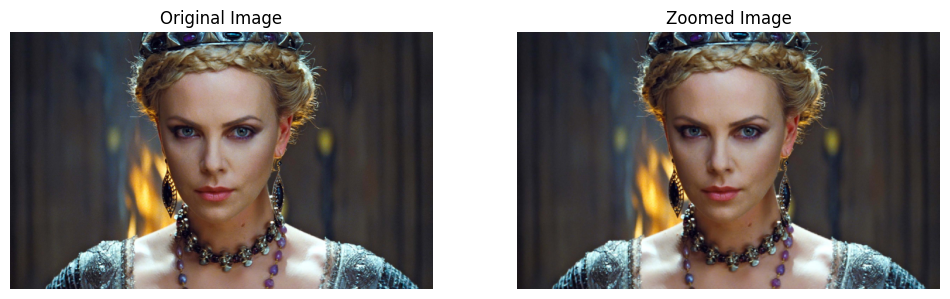

SSD value between original and zoomed images:  1509065900.0


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03small.png',cv.IMREAD_COLOR)
f_rgb = cv.cvtColor(f,cv.COLOR_BGR2RGB)

def ssd(img1,img2):
  if img1.shape != img2.shape:
    img1 = cv.resize(img1, (img2.shape[1], img2.shape[0]), interpolation=cv.INTER_LINEAR)
  img1 = img1.astype(np.float32)
  img2 = img2.astype(np.float32)
  return np.sum((img1-img2)**2)

def Zoom_Image_nearest(img ,factor):
  if not(0<factor<= 10):
    raise ValueError("Zoom factor must be in range (0,10])")

  H,W,C = img.shape
  new_H = int(H*factor)
  new_W = int(W*factor)
  zoomed = np.zeros((new_H,new_W,C),dtype=img.dtype)

  for y_new in range(new_H):
    for x_new in range(new_W):
      y_near = int(round(y_new/factor))
      x_near = int(round(x_new/factor))
      y_near = min(max(y_near, 0), H - 1)
      x_near = min(max(x_near, 0), W - 1)
      zoomed[y_new,x_new] = img[y_near , x_near]

  print("Shape of original image: ",img.shape)
  print("Shape of the zoomed image: ", zoomed.shape)
  return zoomed

factor = 4
print("Zooming factor : ",factor)
zoomed=Zoom_Image_nearest(f ,factor)

zoomed_rgb = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(f_rgb),plt.title('Original Image'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(zoomed_rgb),plt.title('Zoomed Image'),plt.axis('off')
plt.show()
img_original = cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03.png',cv.IMREAD_COLOR)
print("SSD value between original and zoomed images: ", ssd(zoomed,img_original))

###Zooming by using Bilinear interpolation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of original image:  (365, 600, 3)
Shape of the zoomed image:  (1460, 2400, 3)


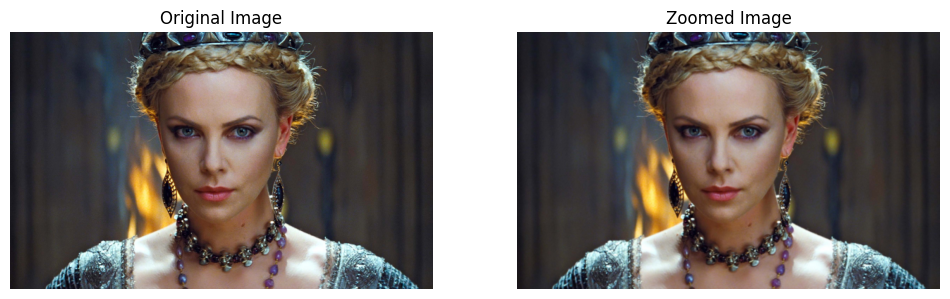

SSD value between original and zoomed images:  1157267300.0


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
zoom_factor=4
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03small.png',cv.IMREAD_COLOR)

def ssd(img1,img2):
  if img1.shape != img2.shape:
    img1 = cv.resize(img1, (img2.shape[1], img2.shape[0]), interpolation=cv.INTER_LINEAR)
  img1 = img1.astype(np.float32)
  img2 = img2.astype(np.float32)
  return np.sum((img1-img2)**2)


def zooming(original_image,zoom_factor):
  if zoom_factor <= 0 or zoom_factor > 10:
    raise ValueError("Zoom factor must be in range (0, 10]")

  # Get original dimensions
  height,width,channels = original_image.shape
  # Calculate new dimensions
  zoomed_height = int(height*zoom_factor)
  zoomed_width = int(width * zoom_factor)
  # Create empty output image
  zoomed_image = np.zeros((zoomed_height, zoomed_width, channels), dtype=np.uint8)

  # Calculate scaling factors
  y_scale = height / zoomed_height
  x_scale = width / zoomed_width

  # Precompute coordinates and weights
  for i in range(zoomed_height):
      for j in range(zoomed_width):
          # Map zoomed coordinates to original image space
          original_y = i * y_scale
          original_x = j * x_scale

          # Get the four surrounding pixel coordinates
          x1 = int(original_x)
          y1 = int(original_y)
          x2 = min(x1 + 1, width - 1)  # Ensure we don't go out of bounds
          y2 = min(y1 + 1, height - 1)  # Ensure we don't go out of bounds

          # Calculate interpolation weights
          dx = original_x - x1
          dy = original_y - y1
          w1 = (1 - dx) * (1 - dy)
          w2 = dx * (1 - dy)
          w3 = (1 - dx) * dy
          w4 = dx * dy

          # Perform bilinear interpolation for each channel
          for c in range(channels):
              zoomed_image[i, j, c] = np.clip(
                  w1 * original_image[y1, x1, c] +
                  w2 * original_image[y1, x2, c] +
                  w3 * original_image[y2, x1, c] +
                  w4 * original_image[y2, x2, c], 0, 255).astype(np.uint8)

  return zoomed_image

zoomed_image=zooming(f,zoom_factor)
print("Shape of original image: ", f.shape)
print("Shape of the zoomed image: ", zoomed_image.shape)
zoomed_image_rgb = cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)),plt.title('Original Image'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(zoomed_image_rgb),plt.title('Zoomed Image'),plt.axis('off')
plt.show()
img_BIG = cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03.png',cv.IMREAD_COLOR)
print("SSD value between original and zoomed images: ",ssd(img_BIG,zoomed_image))

##Q(9)

###(a) GrabCut segmentation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


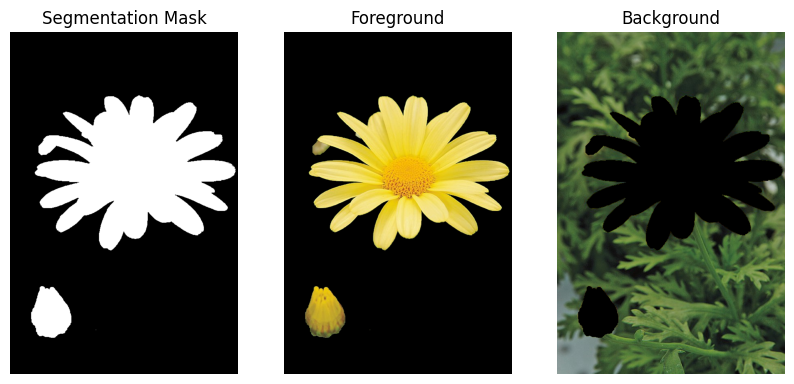

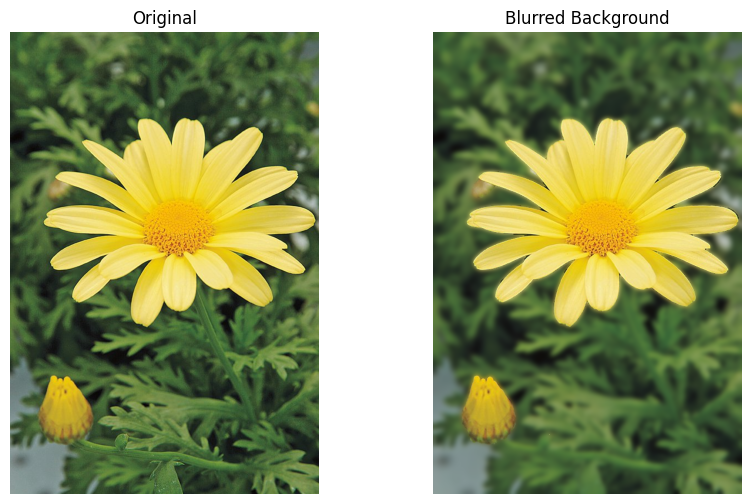

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
zoom_factor=4
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/daisy.jpg')
f_rgb = cv.cvtColor(f,cv.COLOR_BGR2RGB)

#Create initial mask
mask = np.zeros(f.shape[:2],np.uint8)
#Models needed for grabcut
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#Define rectangle for initial segmentation (x,y,w,h)
rect = (50,50,f.shape[1]-50,f.shape[0]-50)
#Apply Grabcut
cv.grabCut(f_rgb,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
#Convert mask to binary (1 = foreground , 0 = background)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#Foreground and background extraction
foreground = f_rgb * mask2[:,:,np.newaxis]
background = f_rgb * (1-mask2[:,:,np.newaxis])

plt.figure(figsize=(10,6))
plt.subplot(1,3,1),plt.imshow(mask2,cmap='gray'),plt.title("Segmentation Mask"),plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(foreground), plt.title("Foreground"),plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(background), plt.title("Background"),plt.axis('off')
plt.show()

#Blur background
blurred = cv.GaussianBlur(f_rgb,(25,25),0)
#Combine blurred background with sharp foreground
enhanced = blurred.copy()
enhanced[mask2 == 1] = f_rgb[mask2 == 1]

#Show original vs enhanced
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1), plt.imshow(f_rgb), plt.title("Original"),plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(enhanced), plt.title("Blurred Background"),plt.axis('off')
plt.show()